In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from seaborn import heatmap
from sklearn import tree
import seaborn as sns
from keras.models import Sequential
import preprocessing as pp

In [3]:
#Aufruf py file

Y_df_train, X_df_train = pp.preprocessing()
Y_df_test, X_df_test = pp.preprocessing("test.csv")

C:\Users\axgno01\Schule\sf-crime-classification\preprocessing.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_temp_data_0 = df_temp_data_0.append(df_temp_data_1, ignore_index = True).append(df_temp_data_2, ignore_index = True).append(df_temp_data_3, ignore_index = True).append(df_temp_data_4, ignore_index = True).append(df_temp_data_5, ignore_index = True).append(df_temp_data_6, ignore_index = True)
C:\Users\axgno01\Schule\sf-crime-classification\preprocessing.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_temp_data_0 = df_temp_data_0.append(df_temp_data_1, ignore_index = True).append(df_temp_data_2, ignore_index = True).append(df_temp_data_3, ignore_index = True).append(df_temp_data_4, ignore_index = True).append(df_temp_data_5, ignore_index = True).append(df_temp_data_6, ignore_index = True)


In [18]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(Y_df_train[0]), y=Y_df_train[0])
class_weight = {v: k for v, k in enumerate(class_weight)}
class_weight

{0: 0.5328522408286036,
 1: 0.17827743401217117,
 2: 0.12881325763342918,
 3: 0.41813872044611194,
 4: 0.5036517467876822,
 5: 0.2442884406849547,
 6: 0.9767605547394124,
 7: 0.29231223225572994,
 8: 2.62605787974209,
 9: 0.6134811025381806,
 10: 0.7152393881178285,
 11: 5.24965977830135,
 12: 2.119788035479123,
 13: 0.41641712331079717,
 14: 4.949910686021797,
 15: 2.250004496622394,
 16: 3.0685793182718153,
 17: 0.8747046971753817,
 18: 1.349569926777356,
 19: 9.595211483673022,
 20: 11.854696342024747,
 21: 9.899821372043593,
 22: 5.127379509430206,
 23: 3.0154169851994186,
 24: 5.208256755229615,
 25: 14.849732058065392,
 26: 46.009825556956706,
 27: 11.82348334481036,
 28: 77.69133173631444,
 29: 19.289342673363294,
 30: 44.19841510195841,
 31: 18.602149852356977,
 32: 151.70807345807347,
 33: 87.70622996794872,
 34: 153.78626624517037,
 35: 55.30245042314008,
 36: 3742.1324786324785,
 37: 7.1688361659626025,
 38: 1020.5815850815851}

In [19]:
X_df_train = (X_df_train - X_df_train.mean())/ X_df_train.std()
X_df_test = (X_df_test - X_df_test.mean())/ X_df_test.std()

In [20]:
from keras.models import Sequential
from keras.layers import Input, Flatten, Dense, Dropout

model = Sequential()

#220, 110, 0.2
model.add(Input(shape=X_df_train.shape[1]))
model.add(Dense(220, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(110, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(220, activation='relu'))
model.add(Dropout(rate=0.1))
model.add(Dense(39, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 220)               5940      
                                                                 
 dropout (Dropout)           (None, 220)               0         
                                                                 
 dense_1 (Dense)             (None, 110)               24310     
                                                                 
 dropout_1 (Dropout)         (None, 110)               0         
                                                                 
 dense_2 (Dense)             (None, 220)               24420     
                                                                 
 dropout_2 (Dropout)         (None, 220)               0         
                                                                 
 dense_3 (Dense)             (None, 39)                8

In [21]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam")

In [22]:
from keras.callbacks import EarlyStopping, LearningRateScheduler
early_stopping = EarlyStopping(
    monitor="val_loss",
    mode="min",
    patience=10,
)

In [25]:
import math

initial_learning_rate = 0.01
epochs = 100
decay = initial_learning_rate / epochs

def lr_time_based_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)

history = model.fit(
  X_df_train,
  Y_df_train[0],
  batch_size=200,
  epochs=10,
  verbose=1,
  validation_split=.2,
  class_weight=class_weight,
  callbacks=[early_stopping, LearningRateScheduler(lr_time_based_decay, verbose=1)]
)



Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/10
3503/3503 [==============================] - 13s 4ms/step - loss: 3.6627 - val_loss: 3.5357 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009999000574917021.
Epoch 2/10
3503/3503 [==============================] - 13s 4ms/step - loss: 3.6046 - val_loss: 3.5472 - lr: 9.9990e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.000999700106714659.
Epoch 3/10
3503/3503 [==============================] - 13s 4ms/step - loss: 3.7376 - val_loss: 3.4690 - lr: 9.9970e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0009994003415259673.
Epoch 4/10
3503/3503 [==============================] - 17s 5ms/step - loss: 3.6957 - val_loss: 3.4741 - lr: 9.9940e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.0009990007918579775.
Epoch 5/10
3503/3503 [==============================] - 16s 5ms/step - loss: 3.6906 - val_loss: 3.4651 - lr: 9.9900e-04

Epoc

In [27]:
m = model.predict(X_df_test)

In [31]:
min(m[0]

2.3042483e-19

In [19]:
import keras
def plot_history(history: keras.callbacks.History):
  """
  plot the training and validation loss for each training epoch

  history: a History object, output of the .fit method of a keras model
  """
  n = len(history.history['loss'])
  plt.plot(np.arange(n), history.history['loss'], label="training loss")
  plt.plot(np.arange(n), history.history['val_loss'], label="validation loss")
  plt.xticks(range(0, n + 1, 2))
  plt.legend()
  plt.show()

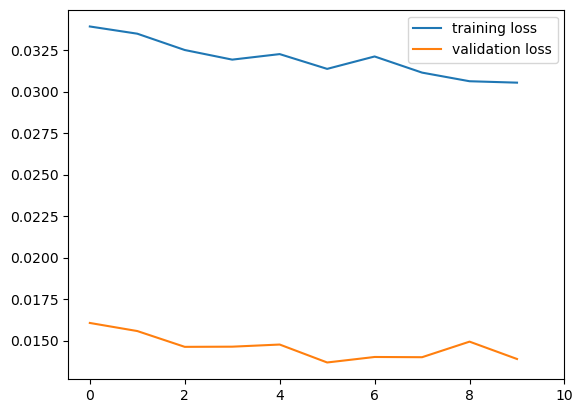

In [20]:
plot_history(history)

#### GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=150, max_depth=8, random_state=0).fit(x_train, y_train)


In [ ]:
y_preds = clf.predict_proba(x_test)
test_log_loss = log_loss(y_test, y_preds)
print("Testing Log Loss:", test_log_loss)

#### RandomForestClassifier

In [70]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=100, random_state=0, class_weight="balanced",n_estimators=150)
clf.fit(x_train, y_train)

#y_pred = clf.predict(x_test)


RandomForestClassifier(class_weight='balanced', max_depth=100, n_estimators=150,
                       random_state=0)

In [71]:
from sklearn.metrics import log_loss


y_preds = clf.predict_proba(x_test)
test_log_loss = log_loss(y_test, y_preds)
print("Testing Log Loss:", test_log_loss)


Testing Log Loss: 3.440130711844978
